In [1]:
!pip install transformers scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
df = pd.read_csv("train.csv")
df.head()
# Ver as primeiras linhas

,id,title,text,subject,date,label
0,13355,"Exclusive: Pentagon, Lockheed near deal on $9 ...",WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,"January 19, 2017",0
1,2113,“HILL”ARIOUS…MUST SEE! IOWA PARADE GOERS Treat...,HILL larious! If this was a Donald Trump pi a...,left-news,"Aug 3, 2016",1
2,27667,Philippine leader says 'no way' he'll do deal ...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 9, 2017",0
3,15368,Biden asks U.S. Congress to allow unencumbered...,WASHINGTON (Reuters) - Vice President Joe Bide...,politicsNews,"September 8, 2016",0
4,6934,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,News,"February 6, 2017",1


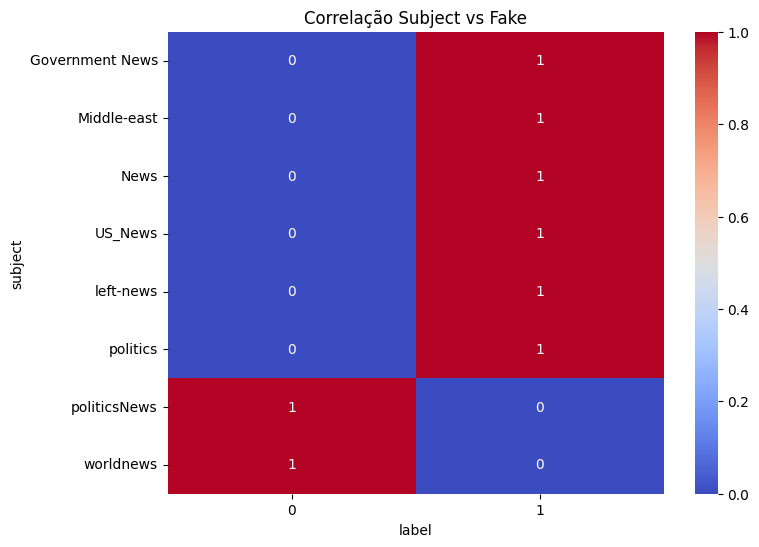

In [7]:
plt.figure(figsize=(8,6))
ct = pd.crosstab(df["subject"], df["label"], normalize="index")
sns.heatmap(ct, annot=True, cmap="coolwarm")
plt.title("Correlação Subject vs Fake")
plt.show()
# Análise da correlação entre o veículo de notícias e a quantidade de casos verdadeiros e falsos

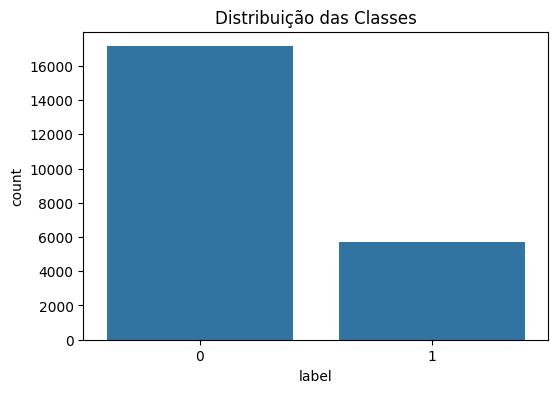

label
0    0.75
1    0.25
Name: proportion, dtype: float64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label")
plt.title("Distribuição das Classes")
plt.show()

print(df["label"].value_counts(normalize=True))

In [10]:
df["title_len"] = df["title"].str.split().apply(len)
df["text_len"] = df["text"].str.split().apply(len)

print(df[["title_len","text_len"]].describe(percentiles=[0.5,0.75,0.9,0.95,0.99]))
# Ver o tamanho dos textos

          title_len      text_len
count  22844.000000  22844.000000
mean      11.139030    396.941429
std        3.346776    316.990996
min        1.000000      0.000000
50%       10.000000    362.000000
75%       12.000000    520.000000
90%       15.000000    766.000000
95%       18.000000    901.000000
99%       23.570000   1276.000000
max       42.000000   8135.000000


In [12]:
texto_total = " ".join(df["text"].dropna())
palavras = texto_total.split()

contagem = Counter(palavras)
print(contagem.most_common(40))
# Frequência de Palavras

[('the', 457745), ('to', 266159), ('of', 221478), ('a', 200029), ('and', 196678), ('in', 173766), ('on', 103110), ('that', 100345), ('for', 84457), ('is', 69611), ('s', 67380), ('said', 63024), ('with', 57210), ('was', 54546), ('The', 54456), ('he', 50149), ('by', 49033), ('as', 49003), ('has', 47180), ('Trump', 45000), ('his', 43142), ('from', 40855), ('it', 40302), ('have', 40293), ('be', 38831), ('not', 38295), ('at', 34008), ('an', 33554), ('U.S.', 32608), ('who', 31807), ('are', 31775), ('would', 30602), ('will', 25448), ('had', 25447), ('-', 24895), ('they', 23161), ('this', 22910), ('been', 21262), ('about', 21145), ('which', 20611)]
